# Table of Contents

1. [Load Packages and Data](#paragraph1)
2. [Raw Data Analysis](#paragraph2)
    1. [EV Survey Data](#subparagraph1)

## Objective
* Determine if there are fundamental issues with the data.
* Do the features appear to be useful to answer the question.



## Load the Required Packages<a name="paragraph1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import numpy as np

from os import listdir
from os.path import isfile, join

import os 
from pathlib import Path

## Defined Functions
will be used in the later sections

In [2]:
def seabornhist(size=(10,10), data=None, hue_c=None, y=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.histplot(y=y, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

## Load the raw data from the pkl files

In [3]:
#collect info about current working directory and the location of the raw data pickle files

wd = Path(os.getcwd())
parent_dir = wd.parent.absolute()


In [4]:
#Data for the EV Vehicle list and attributes
filename = "ev_vehicle_data_raw.pkl"
filepath = f"{wd}\\{filename}"
ev_vehicle_data_raw = pd.read_pickle(filepath)

In [5]:
#Data for the EV survey
filename = "ev_survey_output_raw.pkl"
filepath = f"{wd}\\{filename}"
ev_survey_output_raw = pd.read_pickle(filepath)

## Raw Data Analysis<a name="paragraph2"></a>
Now that we have loaded the raw data into one place, let's take a look at initial findings.

### EV Survey Data<a name="subparagraph1"></a>

In [6]:
ev_survey_output_raw.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   4833 non-null   float64
 1   year_submitted_survey_2       4833 non-null   float64
 2   months_owned                  4330 non-null   float64
 3   year_make_model               4833 non-null   object 
 4   electric_range                4830 non-null   float64
 5   ev_type                       4673 non-null   object 
 6   discontinuance                4833 non-null   object 
 7   surveyed_age                  4373 non-null   float64
 8   surveyed_gender               4438 non-null   object 
 9   dist_1                        3811 non-null   float64
 10  trips_greater_200             4833 non-null   float64
 11  safety_satisfaction           4146 non-null   float64
 12  comfort_satisfaction          4146 non-null   float64
 13  ref

#### What percentage of null values is present in each column?

response_id                      0.041365
home_charge_type                 0.041365
finance_type                     0.041365
trips_greater_200                0.041365
discontinuance                   0.041365
last_page                        0.041365
year_submitted_survey_2          0.041365
year_make_model                  0.041365
electric_range                   0.103413
ev_type                          3.350569
surveyed_gender                  8.210962
surveyed_age                     9.555326
months_owned                    10.444674
adas_satisfaction               14.250259
charge_access_satisfaction      14.250259
range_satisfaction              14.250259
reliability_satisfaction        14.250259
purch_price_satisfaction        14.250259
performance_satisfaction        14.250259
comfort_satisfaction            14.250259
safety_satisfaction             14.250259
env_impact_satisfaction         14.250259
refuel_recharge_satisfaction    14.250259
household_income                15

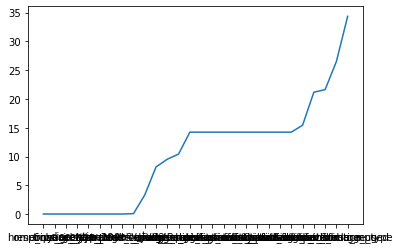

In [7]:
print(100*ev_survey_output_raw.isnull().mean().sort_values(ascending=True))


#plot the missing values for visual reference
a = 100*ev_survey_output_raw.isnull().mean().sort_values(ascending=True)
plt.plot(a)
plt.show()

Observations:

* The satisfaction survey results share an almost identical number of missing entries
* The peak missing value comes from the work_charge_type
* The discontinuance data fortunately contains <1% missing entries.

<AxesSubplot:>

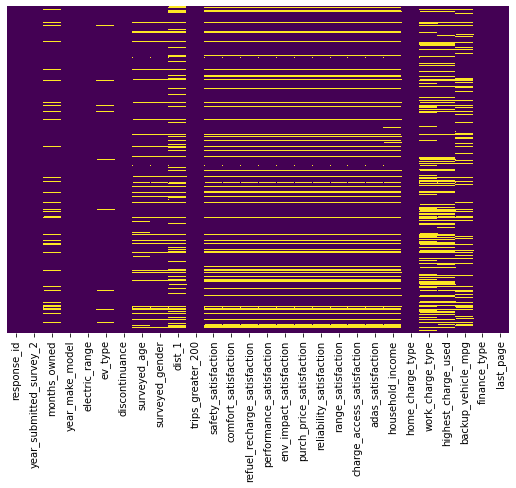

In [8]:
fig_dims = (9, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ev_survey_output_raw.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

## What is the ownership distribution of consumers for this study?

__Definition__: 
* Continued means the user had an EV previously and bought another.
* Original means the user is a first time EV owner.
* Discontinued means that the user decided to get rid of their EV and go to a gasoline vehicle.

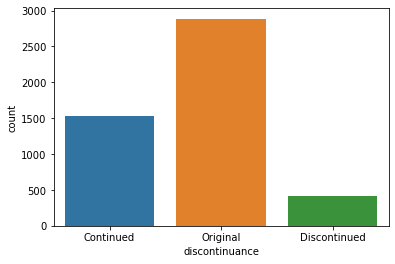

In [9]:
sns.set_theme
ax = sns.countplot(x = ev_survey_output_raw.discontinuance, data = ev_survey_output_raw)
plt.show()

### Age distribution of the EV owners in the study

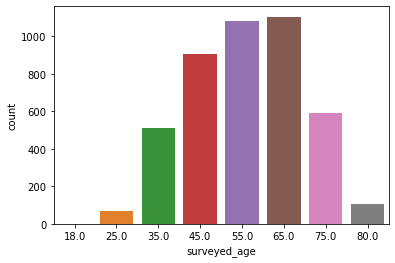

In [10]:
ax = sns.countplot(x = ev_survey_output_raw.surveyed_age, data = ev_survey_output_raw)
plt.show()

C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='electric_range', ylabel='months_owned'>

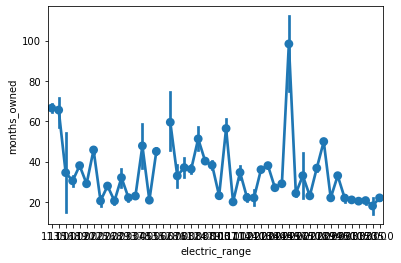

In [11]:
sns.pointplot(ev_survey_output_raw.electric_range, ev_survey_output_raw.months_owned)

### Profile the raw data for the EV survey

In [12]:
#profile = ProfileReport(ev_survey_output_raw, title="Pandas Profiling Report")

In [13]:
#profile.to_widgets()

### Profile the raw data for the EV vehicles

In [14]:
#profile = ProfileReport(ev_vehicle_data_raw, title="Pandas Profiling Report")

In [15]:
#profile.to_widgets()

In [16]:
ev_survey_output_raw.index[ev_survey_output_raw['months_owned'] == True].tolist()

[2689, 3135]

## Data Munging Step (get the data in shape for EDA and modeling)

### Reduce the survey data to respondents who continued or discontinued use.
For the purposes of generating a predictive model, the users who are original owners need to be dropped as there is not a way to predict their next behavior.

In [17]:
#Retain the data for the users who are known to have either discontinued EV ownership or are continued owners.

ev_ownership_sans_original_owners = ev_survey_output_raw.loc[(ev_survey_output_raw.discontinuance == 'Continued') |
                                                             (ev_survey_output_raw.discontinuance == 'Discontinued')]


In [18]:
text = f"The raw dataset included {len(ev_survey_output_raw)} entries, after filtering the original owners there are now {len(ev_ownership_sans_original_owners)} entries."
print(text)

The raw dataset included 4835 entries, after filtering the original owners there are now 1947 entries.


In [19]:
ev_ownership_sans_original_owners.head()

,response_id,year_submitted_survey_2,months_owned,year_make_model,electric_range,ev_type,discontinuance,surveyed_age,surveyed_gender,dist_1,...,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page
0,1.0,2019.0,24.0,2016 BMW i3,81.0,PHEV,Continued,25.0,Male,13.92,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
6,7.0,2019.0,14.0,2016 Fiat 500e,87.0,BEV,Continued,35.0,Male,8.54,...,1.0,3.0,3.0,"$50,000 to $99,999",Level 1,No charging,Level 2,82.0,1.0,40.0
9,11.0,2019.0,48.0,2015 Nissan Leaf,84.0,BEV,Discontinued,55.0,Male,NaN,...,1.0,2.0,1.0,I prefer not to answer,Level 1,No charging,No charging,24.0,1.0,40.0
10,12.0,2019.0,30.0,2015 BMW i3,81.0,PHEV,Continued,55.0,Male,9.43,...,2.0,3.0,3.0,"$100,000 to $149,999",Level 2,Level 1,No charging,34.0,1.0,40.0
11,13.0,2019.0,31.0,2016 Volkswagen e-Golf,84.0,BEV,Continued,35.0,Male,16.32,...,2.0,4.0,2.0,"$150,000 to $199,999",Level 1,Level 1,Level 1 & Level 2,NaN,1.0,40.0


In [20]:
ev_ownership_sans_original_owners.household_income.value_counts()

$150,000 to $199,999      315
$100,000 to $149,999      312
I prefer not to answer    256
$200,000 to $249,999      196
$50,000 to $99,999        178
$250,000 to $299,999      127
$500,000 or more          120
$300,000 to $349,999       76
$350,000 to $399,999       54
Less than $50,000          40
$400,000 to $449,999       29
$450,000 to $499,999       21
Name: household_income, dtype: int64

In [21]:
#_= pd.plotting.scatter_matrix(ev_ownership_sans_original_owners, c='y', figsize=[8,8], s=150, marker='D')
# Make a pairplot of the ev survey data
##sns.pairplot(ev_ownership_sans_original_owners, kind='scatter')

### Set the columns with text data to lowercase
This will help with inconsistency if the data entry wasn't done precisely

In [22]:
for col in ev_ownership_sans_original_owners.columns:
    ev_ownership_sans_original_owners[col]= ev_ownership_sans_original_owners[col]\
                                                    .map(lambda x: x.lower() if isinstance(x,str) else x)
    

<ipython-input-22-fd5ce7fe4550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_ownership_sans_original_owners[col]= ev_ownership_sans_original_owners[col]\


In [23]:
#profile = ProfileReport(ev_ownership_sans_original_owners, title="Pandas Profiling Report")

In [24]:
#profile.to_widgets()

### Split the attributes for the Year Make and Model of each vehicle in the survey into separate columns
This also gets the columns in the format needed to join to the table with the EV vehicle list

In [25]:
models_makes = ev_ownership_sans_original_owners["year_make_model"].str.split(" ", n = 1, expand = True)

year         = models_makes[0].str.split(" ", n = 1, expand = True)[0]
make         = models_makes[1].str.split(" ", n = 1, expand = True)[0]
model        = models_makes[1].str.split(" ", n = 1, expand = True)[0:][1]

temp_my_make = pd.DataFrame(columns =['year','make', 'model'] )
temp_my_make['year']  = year
temp_my_make['year'].replace(' ', '')
temp_my_make['make']  = make
temp_my_make['year'].replace(' ', '')
temp_my_make['model'] = model
temp_my_make.head()

,year,make,model
0,2016,bmw,i3
6,2016,fiat,500e
9,2015,nissan,leaf
10,2015,bmw,i3
11,2016,volkswagen,e-golf


In [26]:
#What are the unique vehicle models in the survey?
temp_my_make.model.unique()

array(['i3', '500e', 'leaf', 'e-golf', 'prius plug-in', 'c-max energi',
       'volt', 'model s', 'fusion energi', 'soul ev', 'model x', 'i-miev',
       'spark ev', 'sonata plug-in hybrid', 'egolf', 'bolt ev', 'mirai',
       'a3 sportback e-tron', 'fit ev', 'rav4 ev', ' prius plug-in',
       'tucson', 'model x 75d', 'focus electric',
       'b-class electric drive', 'i3 rex  (94 amp-hour battery)', 'b250e',
       'model 3 long range', 'elr', 'c-max energi plug-in hybrid',
       'accord plug-in hybrid', 'prius prime', 'fortwo', 'ioniq electric',
       'ev ranger', 'tuscan', 'e-gulf', 'model s (75 kw-hr battery pack)',
       'ds 11.4 kwh battery', 'model s (60 kw-hr battery pack)', 'ecmax',
       'prius', 'i8', 'i3 rex', 'tuscon', 'tuscon fcv', 's-class',
       'fortwo electric drive convertible', '85 s', 'tucson fuel cell',
       'i3 bev (94 amp-hour battery)', 'clarity fuel cell', ' volt',
       ' chevrolet volt', ' model x'], dtype=object)

In [27]:
ev_ownership_sans_original_owners['model_year'] = temp_my_make.year
ev_ownership_sans_original_owners['Make']       = temp_my_make.make
ev_ownership_sans_original_owners['Model']      = temp_my_make.model

<ipython-input-27-23f1cef634e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_ownership_sans_original_owners['model_year'] = temp_my_make.year
<ipython-input-27-23f1cef634e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_ownership_sans_original_owners['Make']       = temp_my_make.make
<ipython-input-27-23f1cef634e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [28]:
ev_ownership_sans_original_owners.head()

,response_id,year_submitted_survey_2,months_owned,year_make_model,electric_range,ev_type,discontinuance,surveyed_age,surveyed_gender,dist_1,...,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page,model_year,Make,Model
0,1.0,2019.0,24.0,2016 bmw i3,81.0,phev,continued,25.0,male,13.92,...,"$150,000 to $199,999",no charging,no charging,level 2,25.0,1.0,40.0,2016,bmw,i3
6,7.0,2019.0,14.0,2016 fiat 500e,87.0,bev,continued,35.0,male,8.54,...,"$50,000 to $99,999",level 1,no charging,level 2,82.0,1.0,40.0,2016,fiat,500e
9,11.0,2019.0,48.0,2015 nissan leaf,84.0,bev,discontinued,55.0,male,NaN,...,i prefer not to answer,level 1,no charging,no charging,24.0,1.0,40.0,2015,nissan,leaf
10,12.0,2019.0,30.0,2015 bmw i3,81.0,phev,continued,55.0,male,9.43,...,"$100,000 to $149,999",level 2,level 1,no charging,34.0,1.0,40.0,2015,bmw,i3
11,13.0,2019.0,31.0,2016 volkswagen e-golf,84.0,bev,continued,35.0,male,16.32,...,"$150,000 to $199,999",level 1,level 1,level 1 & level 2,NaN,1.0,40.0,2016,volkswagen,e-golf


In [29]:
column_list = ev_ownership_sans_original_owners.columns.to_list()

In [30]:
#Extract the current column list. From this list, restructure the columns to the desired target format in the next cell.
column_list

['response_id',
 'year_submitted_survey_2',
 'months_owned',
 'year_make_model',
 'electric_range',
 'ev_type',
 'discontinuance',
 'surveyed_age',
 'surveyed_gender',
 'dist_1',
 'trips_greater_200',
 'safety_satisfaction',
 'comfort_satisfaction',
 'refuel_recharge_satisfaction',
 'performance_satisfaction',
 'env_impact_satisfaction',
 'purch_price_satisfaction',
 'reliability_satisfaction',
 'range_satisfaction',
 'charge_access_satisfaction',
 'adas_satisfaction',
 'household_income',
 'home_charge_type',
 'work_charge_type',
 'highest_charge_used',
 'backup_vehicle_mpg',
 'finance_type',
 'last_page',
 'model_year',
 'Make',
 'Model']

In [31]:
# Reorganize them to the preferred order
column_list = ['response_id',
 'year_submitted_survey_2',
 'months_owned',
 'model_year',
 'Make',
 'Model',           
 'year_make_model',
 'electric_range',
 'ev_type',
 'discontinuance',
 'surveyed_age',
 'surveyed_gender',
 'dist_1',
 'trips_greater_200',
 'safety_satisfaction',
 'comfort_satisfaction',
 'refuel_recharge_satisfaction',
 'performance_satisfaction',
 'env_impact_satisfaction',
 'purch_price_satisfaction',
 'reliability_satisfaction',
 'range_satisfaction',
 'charge_access_satisfaction',
 'adas_satisfaction',
 'household_income',
 'home_charge_type',
 'work_charge_type',
 'highest_charge_used',
 'backup_vehicle_mpg',
 'finance_type',
 'last_page']

### Reindex the dataframe,  drop the year_make_model column now that it has been split into separate cols. 

In [32]:
ev_ownership_sans_original_owners = ev_ownership_sans_original_owners.reindex(columns = column_list)
ev_ownership_sans_original_owners.drop(columns = ['year_make_model'], inplace=True)

In [33]:
ev_ownership_sans_original_owners.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page
0,1.0,2019.0,24.0,2016,bmw,i3,81.0,phev,continued,25.0,...,5.0,5.0,5.0,"$150,000 to $199,999",no charging,no charging,level 2,25.0,1.0,40.0
6,7.0,2019.0,14.0,2016,fiat,500e,87.0,bev,continued,35.0,...,1.0,3.0,3.0,"$50,000 to $99,999",level 1,no charging,level 2,82.0,1.0,40.0
9,11.0,2019.0,48.0,2015,nissan,leaf,84.0,bev,discontinued,55.0,...,1.0,2.0,1.0,i prefer not to answer,level 1,no charging,no charging,24.0,1.0,40.0
10,12.0,2019.0,30.0,2015,bmw,i3,81.0,phev,continued,55.0,...,2.0,3.0,3.0,"$100,000 to $149,999",level 2,level 1,no charging,34.0,1.0,40.0
11,13.0,2019.0,31.0,2016,volkswagen,e-golf,84.0,bev,continued,35.0,...,2.0,4.0,2.0,"$150,000 to $199,999",level 1,level 1,level 1 & level 2,NaN,1.0,40.0


## Merging the datasets, this is a work in progress which may not work out becuase the set of vehicles is different in both.

In [34]:
#What are the unique vehicle models in the vehicle data list?
ev_vehicle_data_raw.Model.unique()

array(['e-tron 55 quattro', 'e-tron 50 quattro', 'e-tron S quattro',
       'e-tron Sportback 50 quattro', 'e-tron Sportback 55 quattro',
       'e-tron Sportback S quattro', 'i3', 'i3s', 'iX3', 'ë-C4',
       'DS3 Crossback e-tense', 'e', 'e Advance', 'Ioniq electric',
       'Kona electric 39.2kWh', 'Kona electric 64kWh', 'I-Pace',
       'e-Niro 39.2kWh', 'e-Niro 64kWh', 'e-Soul 39.2kWh', 'e-Soul 64kWh',
       'MX-30', 'EQC', 'Cooper SE', 'Leaf', 'Leaf e+', 'Corsa-e',
       'Mokka-e', 'e-208', 'e-2008', 'Taycan 4S (Performance)',
       'Taycan 4S (Performance Plus)', 'Taycan Turbo', 'Taycan Turbo S',
       'Zoe R110', 'Zoe R135', 'Citigo-e iV', 'fortwo EQ', 'forfour EQ',
       'Model 3 Standard Range Plus', 'Model 3 Long Range',
       'Model 3 Performance', 'Model S Long Range Plus',
       'Model S Performance', 'Model X Long Range Plus',
       'Model X Performance', 'e-up!', 'ID.3 Pro Performance',
       'ID.3 Pro S', 'ID.4 1st', 'ë-Spacetourer (M)', 'EQV (long)',
       '

In [35]:
ev_vehicle_data_raw.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


#### Join the two dataframes together, add information from the EV vehicles list to the entries in the survey data

In [36]:
merged_ev_data = ev_ownership_sans_original_owners.merge(ev_vehicle_data_raw, on=['Make','Model'], how='left')

In [37]:
merged_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   response_id                             1947 non-null   float64
 1   year_submitted_survey_2                 1947 non-null   float64
 2   months_owned                            1851 non-null   float64
 3   model_year                              1947 non-null   object 
 4   Make                                    1947 non-null   object 
 5   Model                                   1947 non-null   object 
 6   electric_range                          1946 non-null   float64
 7   ev_type                                 1908 non-null   object 
 8   discontinuance                          1947 non-null   object 
 9   surveyed_age                            1872 non-null   float64
 10  surveyed_gender                         1899 non-null   obje

In [38]:
merged_ev_data.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,1.0,2019.0,24.0,2016,bmw,i3,81.0,phev,continued,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,2019.0,14.0,2016,fiat,500e,87.0,bev,continued,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11.0,2019.0,48.0,2015,nissan,leaf,84.0,bev,discontinued,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.0,2019.0,30.0,2015,bmw,i3,81.0,phev,continued,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,2019.0,31.0,2016,volkswagen,e-golf,84.0,bev,continued,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
missing = pd.concat([ev_ownership_sans_original_owners.isnull().sum(), \
                     100 * ev_ownership_sans_original_owners.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= '%', ascending=False)

,count,%
work_charge_type,826,42.424242
highest_charge_used,577,29.635336
backup_vehicle_mpg,360,18.489985
dist_1,332,17.051875
household_income,223,11.453518
safety_satisfaction,194,9.964047
range_satisfaction,194,9.964047
reliability_satisfaction,194,9.964047
purch_price_satisfaction,194,9.964047
env_impact_satisfaction,194,9.964047


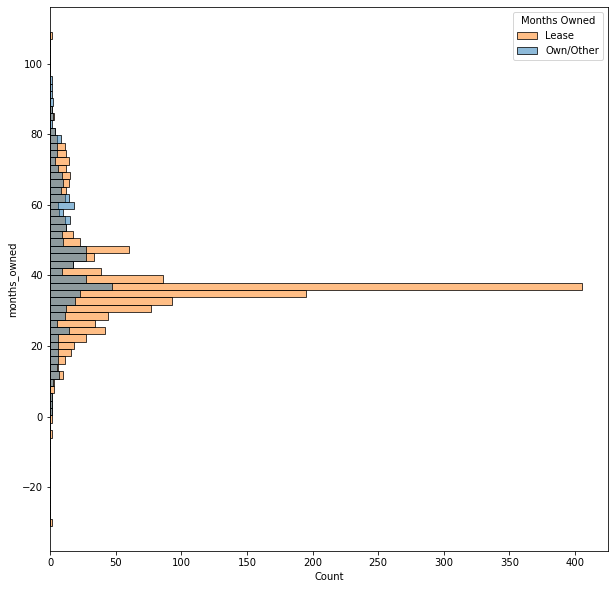

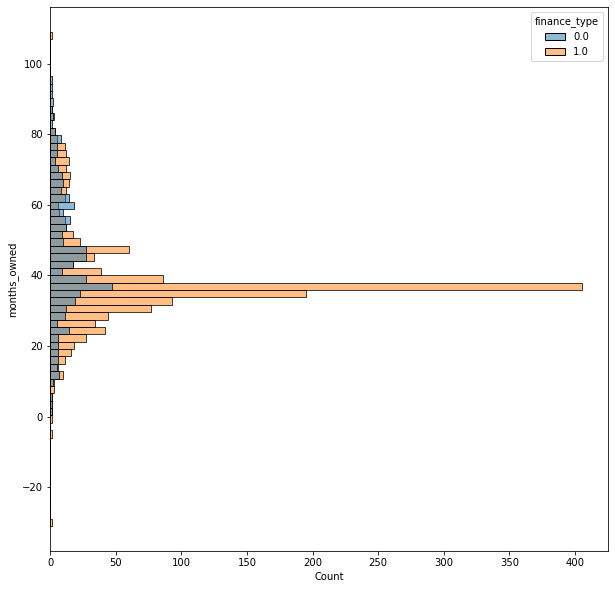

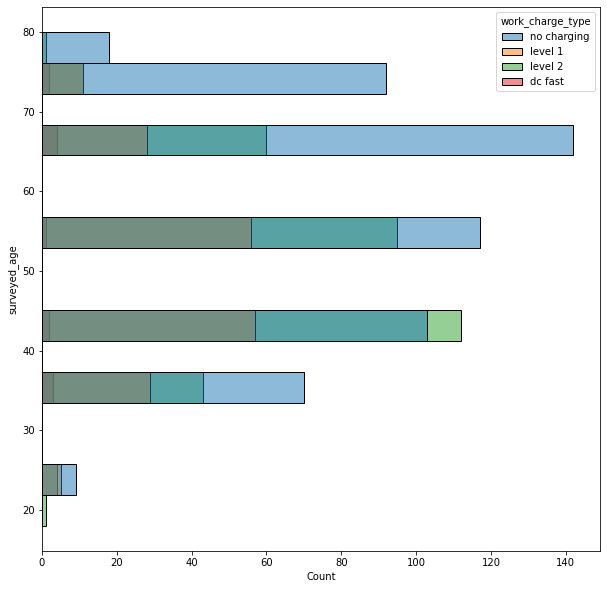

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(y='months_owned', data= ev_ownership_sans_original_owners, hue = 'finance_type', ax=ax)
plt.legend(title='Months Owned', loc='upper right', labels=['Lease', 'Own/Other'])
plt.show()

#Using the defined function
seabornhist(data=ev_ownership_sans_original_owners, hue_c= 'finance_type', y='months_owned')
seabornhist(data=ev_ownership_sans_original_owners, hue_c= 'work_charge_type', y='surveyed_age')

In [41]:
ev_ownership_sans_original_owners.surveyed_age.value_counts()


55.0    488
65.0    440
45.0    437
75.0    224
35.0    221
80.0     37
25.0     24
18.0      1
Name: surveyed_age, dtype: int64

In [42]:
ev_ownership_sans_original_owners.trips_greater_200.value_counts()

0.0      1868
1.0        26
3.0        12
2.0        12
6.0         7
4.0         7
10.0        4
5.0         4
12.0        2
20.0        1
50.0        1
8.0         1
18.0        1
100.0       1
Name: trips_greater_200, dtype: int64

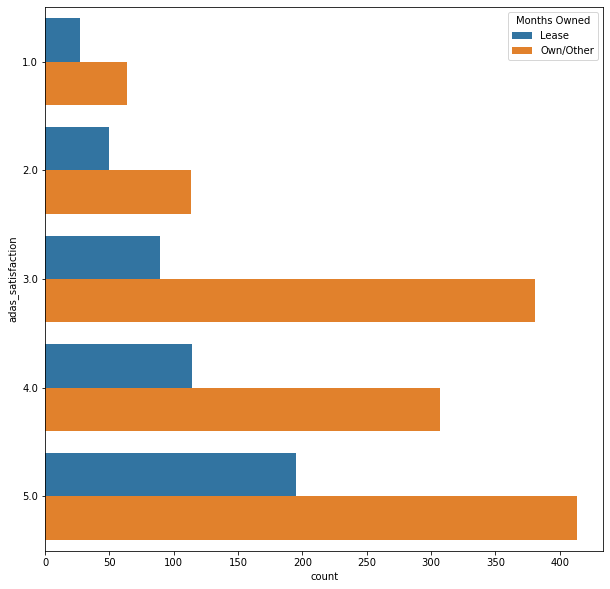

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(y='adas_satisfaction', data= ev_ownership_sans_original_owners, hue = 'finance_type', ax=ax)
plt.legend(title='Months Owned', loc='upper right', labels=['Lease', 'Own/Other'])
plt.show()

### What is the distribution of makes in the dataset?

<AxesSubplot:xlabel='count', ylabel='Make'>

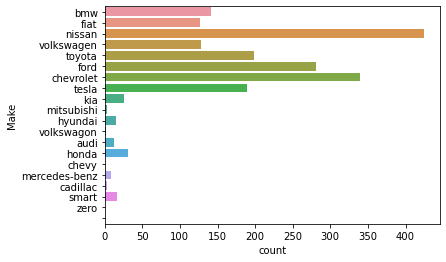

In [44]:
sns.countplot(y=ev_ownership_sans_original_owners['Make'] , data = ev_ownership_sans_original_owners)

Looks good, no duplicate auto manufacturers

In [45]:
ev_ownership_sans_original_owners[ev_ownership_sans_original_owners['surveyed_age']<=0]
ev_ownership_sans_original_owners[ev_ownership_sans_original_owners['months_owned']<0]
ev_ownership_sans_original_owners[ev_ownership_sans_original_owners['electric_range']<0]

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page


#### How fuel efficient are the backup vehicles?

<AxesSubplot:xlabel='count', ylabel='backup_vehicle_mpg'>

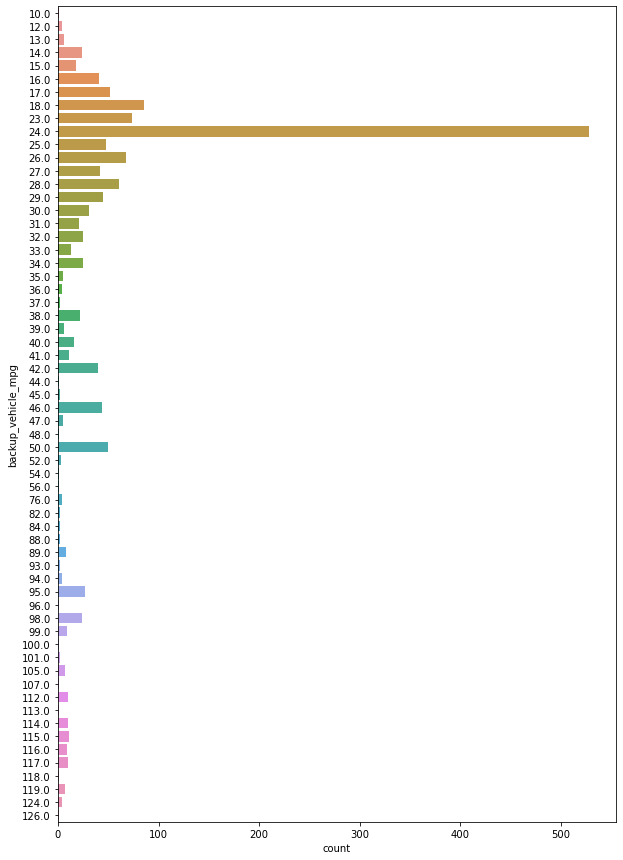

In [46]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y=ev_ownership_sans_original_owners.backup_vehicle_mpg, data=ev_ownership_sans_original_owners, ax=ax)

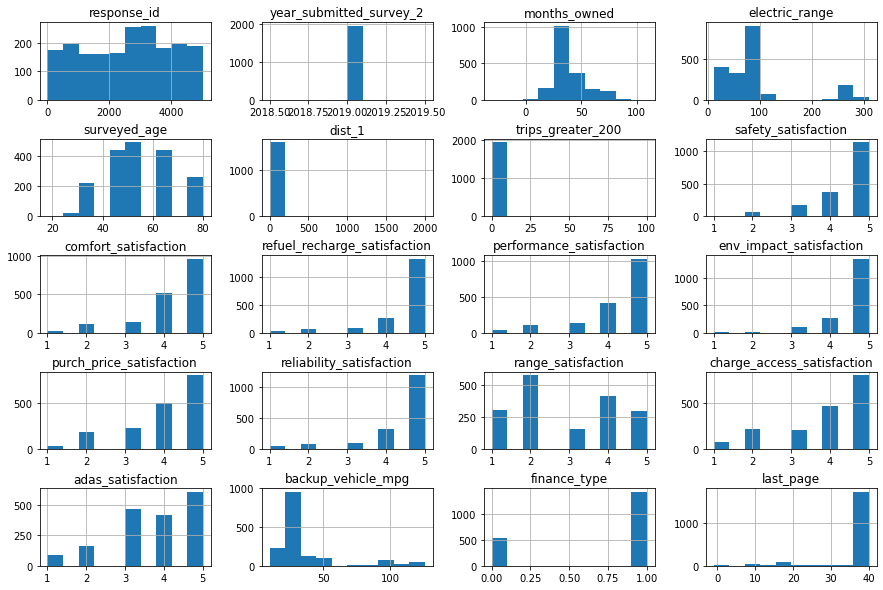

In [47]:
ev_ownership_sans_original_owners.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [48]:
#just to know how much data we lose if we drop all rows with na
ev_survey_no_nan = ev_ownership_sans_original_owners.dropna()

In [49]:
ev_survey_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 4833
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   729 non-null    float64
 1   year_submitted_survey_2       729 non-null    float64
 2   months_owned                  729 non-null    float64
 3   model_year                    729 non-null    object 
 4   Make                          729 non-null    object 
 5   Model                         729 non-null    object 
 6   electric_range                729 non-null    float64
 7   ev_type                       729 non-null    object 
 8   discontinuance                729 non-null    object 
 9   surveyed_age                  729 non-null    float64
 10  surveyed_gender               729 non-null    object 
 11  dist_1                        729 non-null    float64
 12  trips_greater_200             729 non-null    float64
 13  safe

## Drop other columns that wont be useful

In [50]:
ev_ownership_sans_original_owners = ev_ownership_sans_original_owners.drop(columns= ['last_page'])

## Save the wrangled survey data as a .pkl for further use

In [51]:
ev_ownership_sans_original_owners.to_pickle("ev_survey_wrangled_hasna.pkl")

In [52]:
raw_output = pd.read_pickle("ev_survey_wrangled_hasna.pkl")

In [53]:
raw_output.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type
0,1.0,2019.0,24.0,2016,bmw,i3,81.0,phev,continued,25.0,...,5.0,5.0,5.0,5.0,"$150,000 to $199,999",no charging,no charging,level 2,25.0,1.0
6,7.0,2019.0,14.0,2016,fiat,500e,87.0,bev,continued,35.0,...,4.0,1.0,3.0,3.0,"$50,000 to $99,999",level 1,no charging,level 2,82.0,1.0
9,11.0,2019.0,48.0,2015,nissan,leaf,84.0,bev,discontinued,55.0,...,3.0,1.0,2.0,1.0,i prefer not to answer,level 1,no charging,no charging,24.0,1.0
10,12.0,2019.0,30.0,2015,bmw,i3,81.0,phev,continued,55.0,...,5.0,2.0,3.0,3.0,"$100,000 to $149,999",level 2,level 1,no charging,34.0,1.0
11,13.0,2019.0,31.0,2016,volkswagen,e-golf,84.0,bev,continued,35.0,...,5.0,2.0,4.0,2.0,"$150,000 to $199,999",level 1,level 1,level 1 & level 2,NaN,1.0
